In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_CLIENT = 5

ann_client_accuracy = []
ann_client_loss = []
cnn_client_accuracy = []
cnn_client_loss = []

# Loading ANN accuracy of all clients
for i in range(NUM_CLIENT):
    accuracy = np.loadtxt(f'./federated_ANN/results/accuracy_client_{i+1}.txt')
    ann_client_accuracy.append(accuracy)

# Loading ANN loss of all clients
for i in range(NUM_CLIENT):
    loss = np.loadtxt(f'./federated_ANN/results/loss_client_{i+1}.txt')
    ann_client_loss.append(loss)

# Loading CNN accuracy of all clients
for i in range(NUM_CLIENT):
    accuracy = np.loadtxt(f'./federated_CNN/results/accuracy_client_{i+1}.txt')
    cnn_client_accuracy.append(accuracy)

# Loading CNN loss of all clients
for i in range(NUM_CLIENT):
    loss = np.loadtxt(f'./federated_CNN/results/loss_client_{i+1}.txt')
    cnn_client_loss.append(loss)

# Loading ANN accuracy and loss of server
ann_server_accuracy = np.loadtxt(f'./federated_ANN/results/accuracy_server.txt')
ann_server_loss = np.loadtxt(f'./federated_ANN/results/loss_server.txt')

# Loading CNN accuracy and loss of server
cnn_server_accuracy = np.loadtxt(f'./federated_CNN/results/accuracy_server.txt')
cnn_server_loss = np.loadtxt(f'./federated_CNN/results/loss_server.txt')

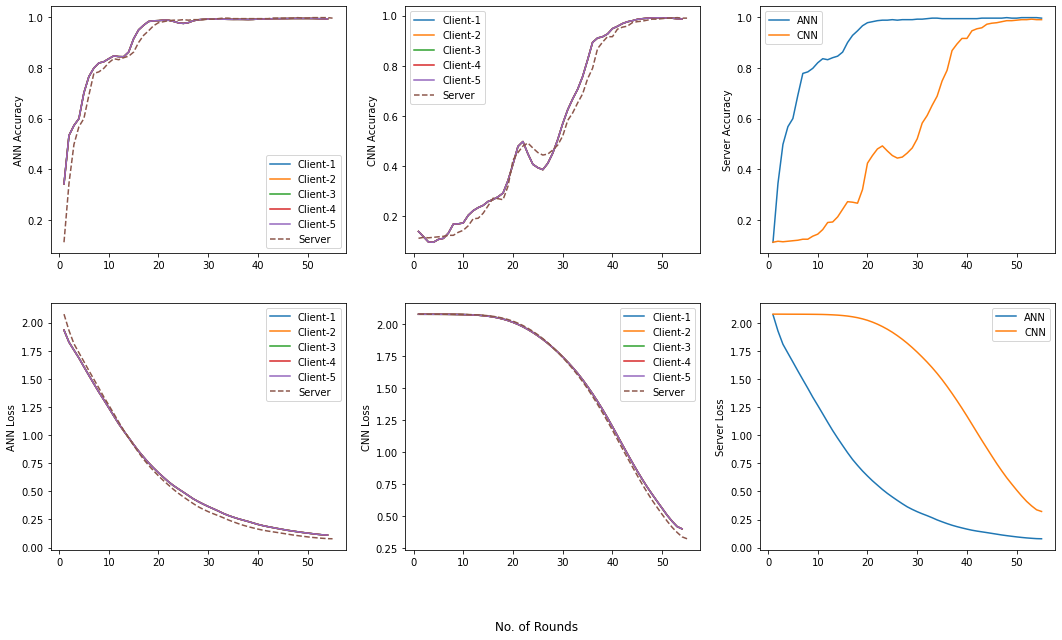

In [7]:
NUM_ROUND = 54
client_x = list(range(1,NUM_ROUND+1))
server_x = list(range(1,NUM_ROUND+2))

figure, axis = plt.subplots(2, 3, figsize=(18, 10))

for i in range(NUM_CLIENT):
    axis[0,0].plot(client_x, ann_client_accuracy[i], label = f'Client-{i+1}')
    axis[0,1].plot(client_x, cnn_client_accuracy[i], label = f'Client-{i+1}')
    axis[1,0].plot(client_x, ann_client_loss[i], label = f'Client-{i+1}')
    axis[1,1].plot(client_x, cnn_client_loss[i], label = f'Client-{i+1}')

axis[0,0].plot(server_x, ann_server_accuracy, linestyle = 'dashed', label = 'Server')
axis[0,1].plot(server_x, cnn_server_accuracy, linestyle = 'dashed', label = 'Server')
axis[1,0].plot(server_x, ann_server_loss, linestyle = 'dashed', label = 'Server')
axis[1,1].plot(server_x, cnn_server_loss, linestyle = 'dashed', label = 'Server')

axis[0,2].plot(server_x, ann_server_accuracy, label = 'ANN')
axis[0,2].plot(server_x, cnn_server_accuracy, label = 'CNN')
axis[1,2].plot(server_x, ann_server_loss, label = 'ANN')
axis[1,2].plot(server_x, cnn_server_loss, label = 'CNN')

axis[0,0].set_ylabel('ANN Accuracy')
axis[0,1].set_ylabel('CNN Accuracy')
axis[0,2].set_ylabel('Server Accuracy')
axis[1,0].set_ylabel('ANN Loss')
axis[1,1].set_ylabel('CNN Loss')
axis[1,2].set_ylabel('Server Loss')

figure.supxlabel("No. of Rounds")

axis[0, 0].legend()
axis[0, 1].legend()
axis[0, 2].legend()
axis[1, 0].legend()
axis[1, 1].legend()
axis[1, 2].legend()
plt.show()